In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
X, y = datasets.make_classification(
    n_samples=10000, n_features=1000, n_informative=50, n_classes=2, weights=(0.67, 0.33), n_clusters_per_class=5,
    random_state=19
)

In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid)

# Default

In [4]:
def evaluate(thresh, title):
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))
    sns.heatmap(
        metrics.confusion_matrix(y_train, model.predict_proba(X_train)[:, 1] > thresh).astype(int), ax=ax[0], square=True,
        cmap='Blues', annot=True, fmt='g'
    )
    sns.heatmap(
        metrics.confusion_matrix(y_valid, model.predict_proba(X_valid)[:, 1] > thresh).astype(int), ax=ax[1], square=True,
        cmap='Blues', annot=True, fmt='g'
    )
    sns.heatmap(
        metrics.confusion_matrix(y_test,  model.predict_proba(X_test )[:, 1] > thresh).astype(int), ax=ax[2], square=True,
        cmap='Blues', annot=True, fmt='g'
    )
    ax[0].set_title('Training Set', fontsize=12)
    ax[0].set_title('Validation Set', fontsize=12)
    ax[0].set_title('Testing Set', fontsize=12)
    fig.suptitle(f'{title} - {round(thresh, 2)}', fontsize=18)

In [5]:
model = LogisticRegression(class_weight='balanced', max_iter=10_000).fit(X_train, y_train)

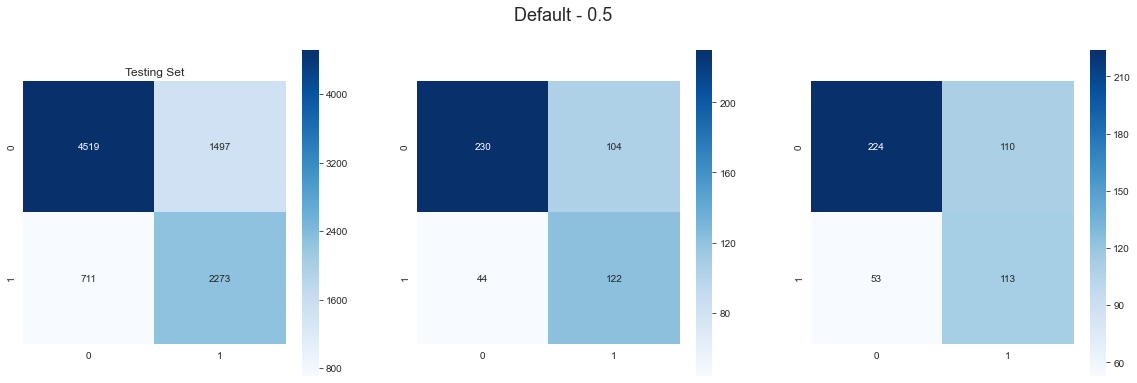

In [6]:
evaluate(0.5, 'Default')

# ROC

Optimal balance between false positive and true positive rates.

The true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

* Sensitivity = TruePositive / (TruePositive + FalseNegative)
* Specificity = TrueNegative / (FalsePositive + TrueNegative)

Therefore:

* Sensitivity = True Positive Rate
* Specificity = 1 – False Positive Rate

The Geometric Mean is a metric, if optimized, will seek a balance between the sensitivity and the specificity.

* G-Mean = sqrt(Sensitivity * Specificity)

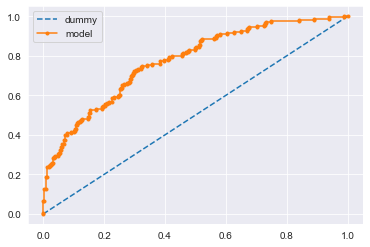

In [7]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, model.predict_proba(X_valid)[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--', label='dummy')
plt.plot(fpr, tpr, marker='.', label='model')
plt.legend();

In [8]:
gmeans = np.sqrt(tpr * (1-fpr))
idx = np.argmax(gmeans)
thresh = thresholds[idx]
thresh

0.5266923800360908

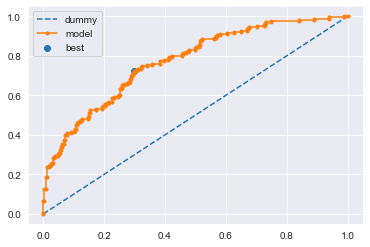

In [9]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, model.predict_proba(X_valid)[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--', label='dummy')
plt.plot(fpr, tpr, marker='.', label='model')
plt.scatter(fpr[idx], tpr[idx], marker='o', label='best')
plt.legend();

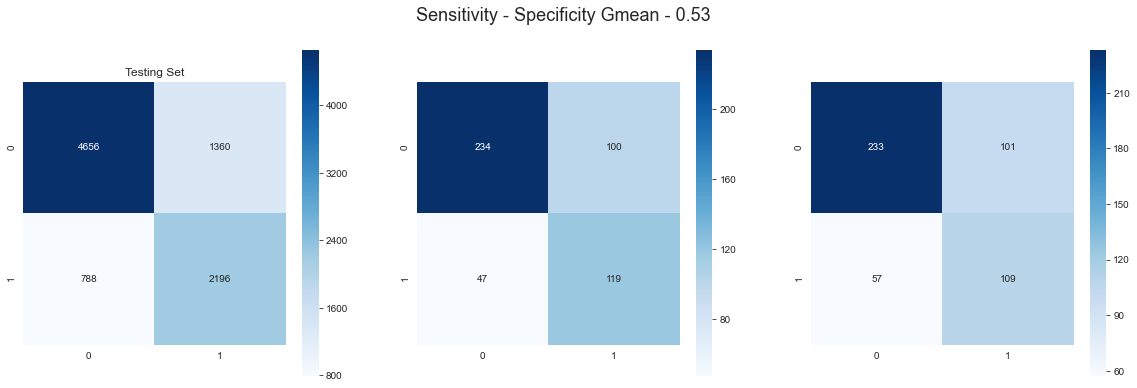

In [10]:
evaluate(thresh, 'Sensitivity - Specificity Gmean')

There is a much faster way to get the same result, called the Youden’s J statistic, which is calculated as:

* J = Sensitivity + Specificity – 1

Given that we have Sensitivity (TPR) and the complement of the specificity (FPR), we can calculate it as:

* J = Sensitivity + (1 – FalsePositiveRate) – 1

Which we can restate as:

* J = TruePositiveRate – FalsePositiveRate

In [11]:
J = tpr -fpr
idx = np.argmax(gmeans)
thresh = thresholds[idx]
thresh

0.5266923800360908

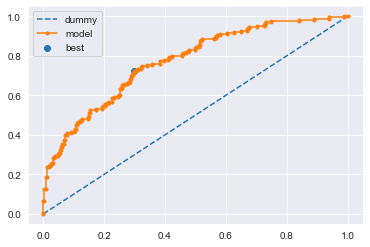

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(y_valid, model.predict_proba(X_valid)[:, 1])
plt.plot([0, 1], [0, 1], linestyle='--', label='dummy')
plt.plot(fpr, tpr, marker='.', label='model')
plt.scatter(fpr[idx], tpr[idx], marker='o', label='best')
plt.legend();

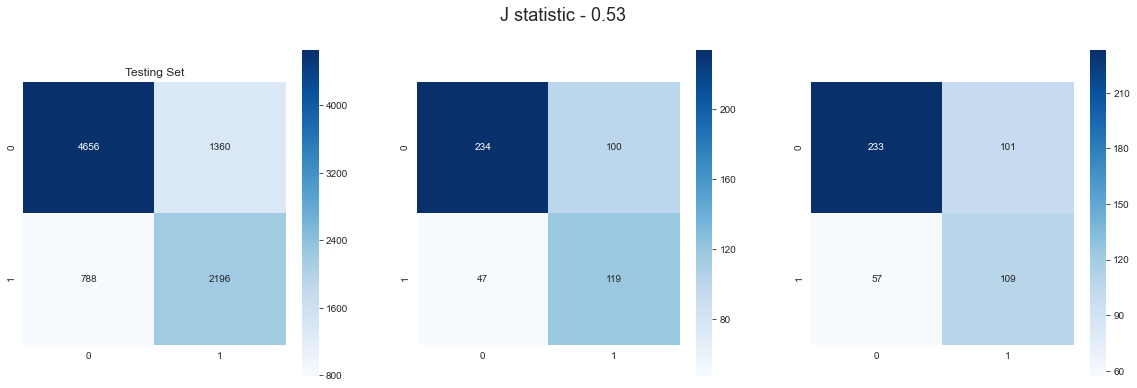

In [13]:
evaluate(thresh, 'J statistic')

# Precision Recall Curve

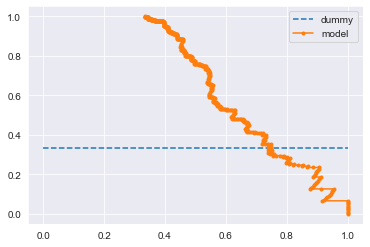

In [14]:
precision, recall, thresholds = metrics.precision_recall_curve(y_valid, model.predict_proba(X_valid)[:, 1])
plt.plot([0, 1], [np.mean(y_valid), np.mean(y_valid)], linestyle='--', label='dummy')
plt.plot(precision, recall, marker='.', label='model')
plt.legend();

In [15]:
f1_scores = (2 * precision * recall)/(precision+ recall)
idx = np.argmax(f1_scores)
thresh = thresholds[idx]
thresh

0.48827048777730525

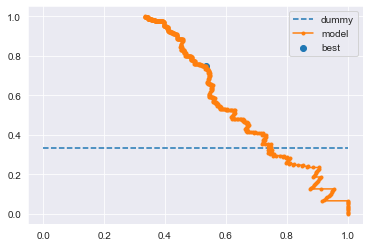

In [16]:
precision, recall, thresholds = metrics.precision_recall_curve(y_valid, model.predict_proba(X_valid)[:, 1])
plt.plot([0, 1], [np.mean(y_valid), np.mean(y_valid)], linestyle='--', label='dummy')
plt.plot(precision, recall, marker='.', label='model')
plt.scatter(precision[idx], recall[idx], marker='o', label='best')
plt.legend();

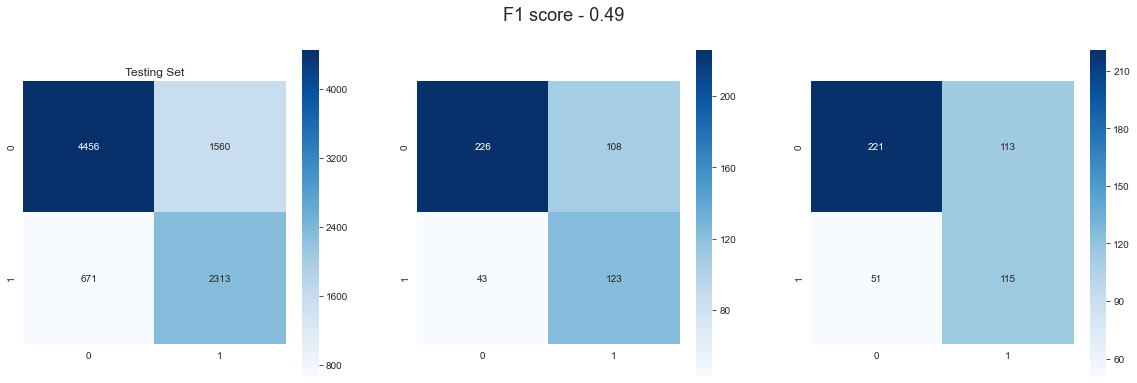

In [17]:
evaluate(thresh, 'F1 score')